In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [14]:
file_path1 = "Resources/2020-2021vs2019_Seated_Diner_Data.csv"
DinerDataDf = pd.read_csv(file_path1)
DinerDataDf.head(70)

,Type,Name,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,...,2021/10/16,2021/10/17,2021/10/18,2021/10/19,2021/10/20,2021/10/21,2021/10/22,2021/10/23,2021/10/24,2021/10/25
0,country,Global,-1%,3%,-1%,-2%,1%,4%,1%,1%,...,3.2%,3.81%,-11.56%,-10.21%,-7.11%,-4.48%,2.89%,8%,4.55%,-12.95%
1,country,Australia,-3%,-6%,-3%,-1%,0%,0%,0%,-2%,...,29.22%,21.48%,-8.42%,-4.78%,8.73%,11.32%,81.57%,84.35%,90.95%,38.34%
2,country,Canada,-5%,0%,-3%,-2%,-1%,8%,-2%,-3%,...,-7.24%,-9.71%,-14.13%,-14.38%,-13.93%,-17.41%,-6.35%,-0.23%,-4.85%,-19.92%
3,country,Germany,11%,4%,3%,5%,1%,2%,11%,4%,...,24.82%,23.26%,18.33%,20.19%,26.14%,22.33%,28.55%,26.1%,17.32%,8.53%
4,country,Ireland,2%,0%,4%,1%,-3%,4%,-9%,-8%,...,115.14%,116.46%,77.28%,71.87%,70.59%,78.47%,131.15%,115.91%,124.67%,118.38%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,state,Virginia,6%,58%,-1%,-3%,6%,7%,2%,2%,...,-1.16%,12.92%,-16.92%,-10.65%,-10.31%,-9.16%,3.03%,4.37%,-1.71%,-30.41%
66,state,Washington,9%,8%,6%,3%,2%,10%,-1%,-2%,...,-12.37%,-19.11%,-31%,-29.56%,-29.79%,-25.75%,-10.33%,-5.6%,-12.04%,-42.13%
67,state,Wisconsin,3%,21%,-1%,-3%,14%,25%,0%,9%,...,-13.87%,-11.69%,-18.53%,-9.05%,-13.68%,-6.97%,-1.34%,7.75%,-11.98%,-19.54%
68,city,Atlanta,6%,9%,-5%,-5%,-3%,-7%,-6%,1%,...,0.95%,-14.55%,-17.29%,-25.61%,-29.99%,-19.52%,-6.19%,-2.39%,-20.08%,-32.44%


In [6]:
file_path2 = "Resources/mandates_by_state.csv"
StateMandateDF = pd.read_csv(file_path2)
StateMandateDF.head()

,state,maskdays,days,maskcoverage
0,AL,17889,33031,0.54
1,AK,0,14297,0.00
2,AZ,0,7395,0.00
3,AR,19050,36975,0.52
4,CA,24592,28594,0.86


In [40]:
DinerDataDfStates

,Type,Name,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,...,2021/10/17,2021/10/18,2021/10/19,2021/10/20,2021/10/21,2021/10/22,2021/10/23,2021/10/24,2021/10/25,State Code
8,state,Alabama,-14%,7%,1%,-2%,8%,2%,1%,0%,...,0.92%,-19.97%,-20.36%,-13.74%,-9.38%,3.18%,21.75%,13.03%,-10.29%,AL
9,state,Alberta,2%,10%,2%,1%,5%,0%,-1%,3%,...,-13.29%,-14.41%,-27.23%,-14.2%,-24.24%,2.08%,6.72%,-4.6%,-21.67%,
10,state,Arizona,0%,1%,8%,4%,-3%,5%,2%,5%,...,17.67%,7.86%,9.24%,18.71%,21.23%,28.6%,39.06%,23.15%,15.67%,AZ
11,state,Baden-Württemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.48%,4.11%,10.81%,23.93%,25.27%,31.76%,26.15%,23.89%,4.3%,
12,state,Baja California Sur,-6%,-2%,-2%,-9%,1%,1%,29%,6%,...,98.59%,72.34%,69.89%,79.48%,65.09%,67.74%,76.15%,85.32%,79.75%,
13,state,Bavaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.1%,26.47%,30.99%,41.9%,33.19%,50.75%,43.41%,38.03%,16.69%,
14,state,British Columbia,8%,-3%,1%,6%,3%,-2%,-3%,-5%,...,-4.92%,-5.43%,-12.1%,-15.65%,-8.99%,-6.37%,-0.88%,-17.04%,-14.79%,
15,state,California,-2%,2%,5%,0%,-2%,7%,3%,6%,...,-5.08%,-20.28%,-19.32%,-17.01%,-12.28%,-2.76%,0.11%,-10.67%,-30.84%,CA
16,state,Colorado,1%,-8%,-4%,7%,1%,-8%,-2%,-4%,...,16.06%,2.2%,-6.47%,9.71%,-6.58%,-1.07%,-0.27%,37.98%,-10.6%,CO
17,state,Connecticut,8%,26%,1%,-3%,-6%,2%,-2%,6%,...,48.08%,-0.03%,12.77%,20.22%,38.38%,49.27%,36%,57.27%,-0.42%,CT


In [38]:
#Give Each State a State Code for merging
DinerDataDfStates = DinerDataDf.iloc[8:67, :]
DinerDataDfStates["State Code"] = ""
DinerDataDfStates.loc[8, "State Code"] = "AL"
DinerDataDfStates.loc[10, "State Code"] = "AZ"
DinerDataDfStates.loc[15, "State Code"] = "CA"
DinerDataDfStates.loc[16, "State Code"] = "CO"
DinerDataDfStates.loc[17, "State Code"] = "CT"
DinerDataDfStates.loc[18, "State Code"] = "DE"
DinerDataDfStates.loc[19, "State Code"] = "DC"
DinerDataDfStates.loc[20, "State Code"] = "FL"
DinerDataDfStates.loc[21, "State Code"] = "GA"
DinerDataDfStates.loc[22, "State Code"] = "HI"
DinerDataDfStates.loc[24, "State Code"] = "IL"
DinerDataDfStates.loc[25, "State Code"] = "IN"
DinerDataDfStates.loc[27, "State Code"] = "KS"
DinerDataDfStates.loc[28, "State Code"] = "KY"
DinerDataDfStates.loc[29, "State Code"] = "LA"
DinerDataDfStates.loc[31, "State Code"] = "ME"
DinerDataDfStates.loc[33, "State Code"] = "MD"
DinerDataDfStates.loc[34, "State Code"] = "MA"
DinerDataDfStates.loc[36, "State Code"] = "MI"
DinerDataDfStates.loc[37, "State Code"] = "MN"
DinerDataDfStates.loc[38, "State Code"] = "MO"
DinerDataDfStates.loc[39, "State Code"] = "NE"
DinerDataDfStates.loc[40, "State Code"] = "NV"
DinerDataDfStates.loc[41, "State Code"] = "NH"
DinerDataDfStates.loc[42, "State Code"] = "NJ"
DinerDataDfStates.loc[43, "State Code"] = "NM"
DinerDataDfStates.loc[45, "State Code"] = "NY"
DinerDataDfStates.loc[46, "State Code"] = "NC"
DinerDataDfStates.loc[49, "State Code"] = "OH"
DinerDataDfStates.loc[50, "State Code"] = "OK"
DinerDataDfStates.loc[52, "State Code"] = "OR"
DinerDataDfStates.loc[53, "State Code"] = "PA"
DinerDataDfStates.loc[58, "State Code"] = "RI"
DinerDataDfStates.loc[60, "State Code"] = "SC"
DinerDataDfStates.loc[61, "State Code"] = "TN"
DinerDataDfStates.loc[62, "State Code"] = "TX"
DinerDataDfStates.loc[63, "State Code"] = "UT"
DinerDataDfStates.loc[65, "State Code"] = "VA"
DinerDataDfStates.loc[66, "State Code"] = "WA"



<ipython-input-38-06ea4110cabb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DinerDataDfStates["State Code"] = ""
C:\Users\steve\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
#Rename column to State Code for merge
RenamedStates = StateMandateDF.rename(columns={"state" : "State Code"})
RenamedStates

,State Code,maskdays,days,maskcoverage
0,AL,17889,33031,0.54
1,AK,0,14297,0.00
2,AZ,0,7395,0.00
3,AR,19050,36975,0.52
4,CA,24592,28594,0.86
5,CO,16704,31552,0.53
6,DC,386,493,0.78
7,CT,3864,3944,0.98
8,FL,0,33031,0.00
9,DE,1233,1479,0.83


In [52]:
MergedDF = pd.merge(DinerDataDfStates, RenamedStates, on="State Code", how="outer")
MergedDF.head(60)

,Type,Name,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,...,2021/10/20,2021/10/21,2021/10/22,2021/10/23,2021/10/24,2021/10/25,State Code,maskdays,days,maskcoverage
0,state,Alabama,-14%,7%,1%,-2%,8%,2%,1%,0%,...,-13.74%,-9.38%,3.18%,21.75%,13.03%,-10.29%,AL,17889.0,33031.0,0.54
1,state,Alberta,2%,10%,2%,1%,5%,0%,-1%,3%,...,-14.2%,-24.24%,2.08%,6.72%,-4.6%,-21.67%,,NaN,NaN,NaN
2,state,Baden-Württemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.93%,25.27%,31.76%,26.15%,23.89%,4.3%,,NaN,NaN,NaN
3,state,Baja California Sur,-6%,-2%,-2%,-9%,1%,1%,29%,6%,...,79.48%,65.09%,67.74%,76.15%,85.32%,79.75%,,NaN,NaN,NaN
4,state,Bavaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.9%,33.19%,50.75%,43.41%,38.03%,16.69%,,NaN,NaN,NaN
5,state,British Columbia,8%,-3%,1%,6%,3%,-2%,-3%,-5%,...,-15.65%,-8.99%,-6.37%,-0.88%,-17.04%,-14.79%,,NaN,NaN,NaN
6,state,Hesse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.57%,-3.3%,0.54%,7.39%,-5.62%,3.76%,,NaN,NaN,NaN
7,state,Jalisco,8%,9%,0%,5%,-6%,2%,-9%,-4%,...,18.63%,10.37%,26.98%,17.92%,30.83%,21.65%,,NaN,NaN,NaN
8,state,Lower Saxony,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.35%,38.34%,36.6%,33.26%,8.06%,32.05%,,NaN,NaN,NaN
9,state,Manitoba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.58%,2.98%,7%,9.04%,-15.11%,-2.89%,,NaN,NaN,NaN


In [70]:
ThreeNullValueStates = (MergedDF.loc[35, :], MergedDF.loc[43, :], MergedDF.loc[25, :])
#ThreeNullValueStates
CleanedStatesDF = MergedDF.dropna(how="any")
DfThree = pd.DataFrame(ThreeNullValueStates)
FullDF = CleanedStatesDF.append(DfThree)
FullDF

,Type,Name,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,...,2021/10/20,2021/10/21,2021/10/22,2021/10/23,2021/10/24,2021/10/25,State Code,maskdays,days,maskcoverage
0,state,Alabama,-14%,7%,1%,-2%,8%,2%,1%,0%,...,-13.74%,-9.38%,3.18%,21.75%,13.03%,-10.29%,AL,17889.0,33031.0,0.54
21,state,Arizona,0%,1%,8%,4%,-3%,5%,2%,5%,...,18.71%,21.23%,28.6%,39.06%,23.15%,15.67%,AZ,0.0,7395.0,0.00
22,state,California,-2%,2%,5%,0%,-2%,7%,3%,6%,...,-17.01%,-12.28%,-2.76%,0.11%,-10.67%,-30.84%,CA,24592.0,28594.0,0.86
23,state,Colorado,1%,-8%,-4%,7%,1%,-8%,-2%,-4%,...,9.71%,-6.58%,-1.07%,-0.27%,37.98%,-10.6%,CO,16704.0,31552.0,0.53
24,state,Connecticut,8%,26%,1%,-3%,-6%,2%,-2%,6%,...,20.22%,38.38%,49.27%,36%,57.27%,-0.42%,CT,3864.0,3944.0,0.98
26,state,District of Columbia,-5%,55%,8%,0%,8%,15%,11%,8%,...,-42.4%,-34.71%,-22.83%,-13.59%,-20.55%,-49.19%,DC,386.0,493.0,0.78
27,state,Florida,0%,-3%,-4%,-5%,2%,2%,2%,5%,...,5.73%,9.58%,12.44%,21.4%,15.58%,4.9%,FL,0.0,33031.0,0.00
28,state,Georgia,0%,4%,-6%,-5%,-2%,-9%,-9%,2%,...,-11.72%,-3.27%,9.71%,16.95%,1.26%,-20.56%,GA,0.0,78387.0,0.00
29,state,Hawaii,0%,2%,4%,5%,4%,3%,2%,-1%,...,-21.1%,-17.52%,-12.35%,-17.87%,-20.24%,-17.17%,HI,2430.0,2465.0,0.99
30,state,Illinois,-4%,4%,-2%,-3%,6%,11%,-5%,-14%,...,-28.57%,-29.18%,-21.02%,-6.73%,-31.5%,-41.65%,IL,41412.0,50286.0,0.82


In [107]:
#New Jersey had the Earliest Mask Mandate on April 10 2020
FirstMandate = FullDF["2020/4/10"]
NewYear = FullDF["2021/1/1"]
Current = FullDF["2021/10/1"]
#Change Data Type from Object to Float
NewYearRev = NewYear.str.rstrip('%').astype('float')/100
FirstMandateRev = FirstMandate.str.rstrip('%').astype('float')/100
CurrentRev = Current.str.rstrip('%').astype('float')/100
CurrentRev

0    -0.1348
21    0.2505
22   -0.0428
23   -0.1123
24    0.2954
26   -0.2518
27    0.0693
28    0.0437
29   -0.2984
30   -0.1375
31    0.0432
32   -0.0223
33   -0.0012
34   -0.1954
36   -0.2278
37   -0.0832
38   -0.0854
39   -0.1326
40   -0.0895
41   -0.0165
42    0.1688
44    0.1146
45   -0.2751
46   -0.2936
47   -0.0321
48   -0.0713
49    0.1850
50   -0.1704
51   -0.1724
52    0.4214
53   -0.0083
54    0.0223
55    0.0797
56    0.1069
57   -0.0286
58   -0.1655
35    0.1000
43   -0.1264
25   -0.0603
Name: 2021/10/1, dtype: float64

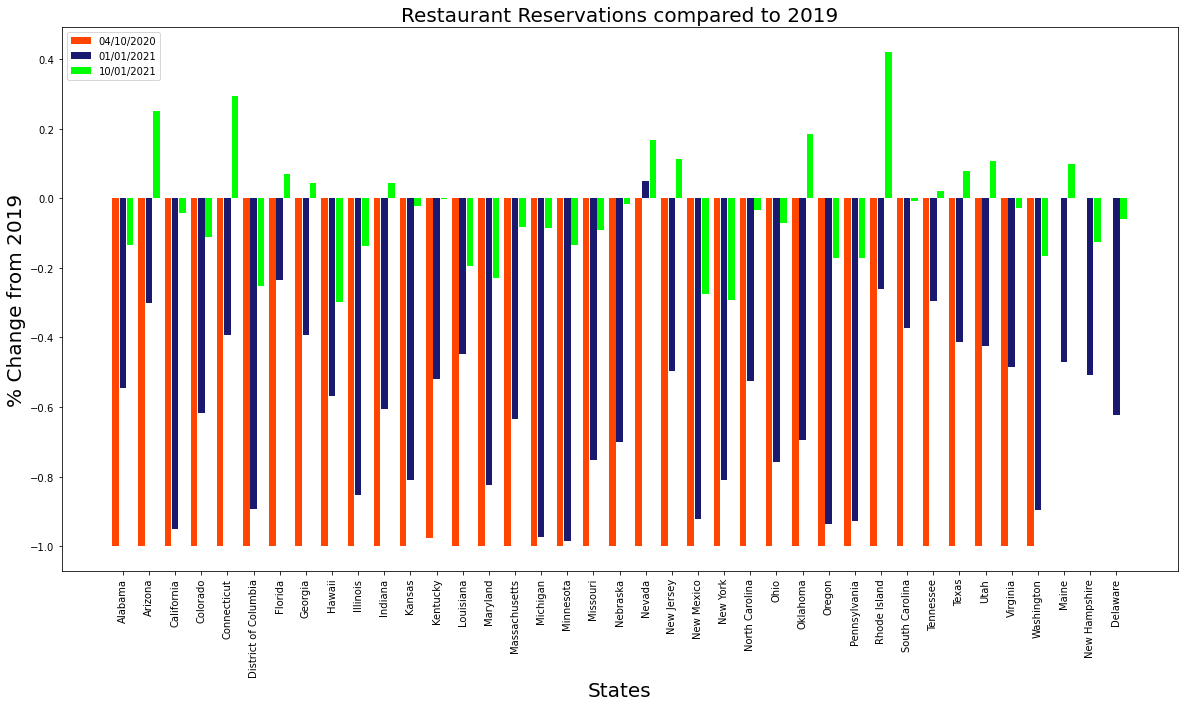

In [181]:
#Create Bar Chart to show States Restaurant Reservations- Who were the most/least cautious
r = np.arange(len(CurrentRev))
width = 0.25

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
#plt.bar(FullDF["Name"], FirstMandateRev, width)
#plt.bar(FullDF["Name"], NewYearRev, width)
#plt.bar(FullDF["Name"], CurrentRev, width)
plt.bar(r-0.28, FirstMandateRev, width, color="orangered", label="04/10/2020")
plt.bar(r, NewYearRev, width, color="midnightblue", label="01/01/2021")
plt.bar(r+0.28, CurrentRev, width, color="lime", label="10/01/2021")
plt.xlabel("States", size=20)
plt.ylabel("% Change from 2019", size=20)
plt.title("Restaurant Reservations compared to 2019", size=20)
plt.xticks(r, FullDF["Name"])
plt.legend()
plt.savefig("Images/RestaurantReservationBar.png")
plt.show()

#Alaska, Arkansas, Idaho, Iowa, Montana, Mississippi, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin, Wyoming 
#All Excluded States because there was no restaurant data


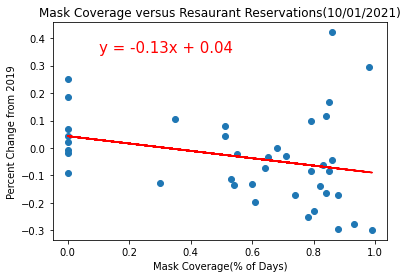

<Figure size 1080x720 with 0 Axes>

In [178]:
#Map and find any correlation between how much mask coverage(days) a state has compared to it's restaurants reservations 
x_values = FullDF["maskcoverage"]
y_values = CurrentRev
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(FullDF["maskcoverage"], CurrentRev)
plt.ylabel("Percent Change from 2019")
plt.xlabel("Mask Coverage(% of Days)")
plt.title("Mask Coverage versus Resaurant Reservations(10/01/2021)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.1,0.35),fontsize=15,color="red")
plt.savefig("Images/RegressionScatter.png")
plt.figure(figsize=(15,10))

plt.show()

In [171]:
print(rvalue)
print(pvalue)

-0.27620983180473435
0.08873673599757953
